## WEEK 02, Lecture 03 
# Trainer : Saad Ahmed Qadeer

## Understanding Patterns in Real-World Data
**A comprehensive guide to Normal, Binomial, and Poisson distributions**

---

### What You'll Learn Today

By the end of this lecture, you'll understand:
1. What probability distributions actually are
2. Three distributions that show up in real data
3. How to generate (sample) data from distributions
4. How to calculate probabilities
5. Why this matters for real-world decisions
6. When to use each distribution

---
# SEGMENT 1: Setup and Tools

In [ ]:
# Load our toolkit - these are the tools we'll use to explore distributions

import numpy as np                           # For math operations and random numbers
import pandas as pd                          # For organizing data in tables
import matplotlib.pyplot as plt              # For drawing charts
import seaborn as sns                        # For prettier charts
from scipy.stats import norm, binom, poisson # These generate distributions for us
from scipy.stats import skew, kurtosis       # To analyze distribution shapes
import warnings
warnings.filterwarnings('ignore')

# Make our charts look nice
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

print("All tools loaded! Ready to explore probability distributions.")

All tools loaded! Ready to explore probability distributions.


---
# SEGMENT 2: What Are Probability Distributions?

## The Story

Imagine you flip a coin 1000 times.

You WON'T get:
- 950 heads and 50 tails
- Some random pattern

You WILL get:
- Roughly 500 heads and 500 tails
- A predictable pattern

**That pattern is called a probability distribution.**

## Simple Definition

A **probability distribution** is a description of:
- What values are possible?
- How likely is each value?
- What pattern will the data follow?

It's like a recipe that tells you what to expect.

## Why This Matters in Real Life

**At a Bank:**
- "How many customers will come today?"
- "What will the average wait time be?"
- Use distributions to predict

**At a Factory:**
- "How many items will be defective?"
- "Is today's defect rate normal or weird?"
- Use distributions to quality check

**At a Hospital:**
- "Is this patient's temperature normal?"
- "Is this blood test result concerning?"
- Use distributions to diagnose

**The Pattern:** You're always asking "Is this normal or abnormal? Use distributions to answer."

---
# SEGMENT 3: The Normal Distribution (Bell Curve)

## What Is It?

The normal distribution is the most famous one. It looks like a bell, is symmetric (balanced), and shows up everywhere.

**Places You See It:**
- Height of people (most are average, few very tall or short)
- Test scores (most are average, few get A's or F's)
- Product quality (most items are good, few are defective)
- Errors in measurements (most are close to true value, few are way off)
- Temperature variations (most days are average, few extremely hot/cold)

## Key Concept: Mean and Standard Deviation

Every normal distribution is defined by two numbers:

**Mean (μ)** = The center, the average, where most values pile up
- Example: Average height is 5'10"

**Standard Deviation (σ)** = How spread out values are from the mean
- Small σ = values are tight (everyone's similar height)
- Large σ = values are spread out (very varied heights)

## The Empirical Rule: 68-95-99.7

This is one of the most useful facts in statistics:

- **68%** of values fall within 1 standard deviation of mean
- **95%** of values fall within 2 standard deviations
- **99.7%** of values fall within 3 standard deviations

**Real Example:**
- Test scores: mean=70, std=10
- 68% of students scored 60-80 (within 1σ)
- 95% of students scored 50-90 (within 2σ)
- 99.7% of students scored 40-100 (within 3σ)

**Implication:** Only 2.5% scored above 90 or below 50. Those are the extreme students!

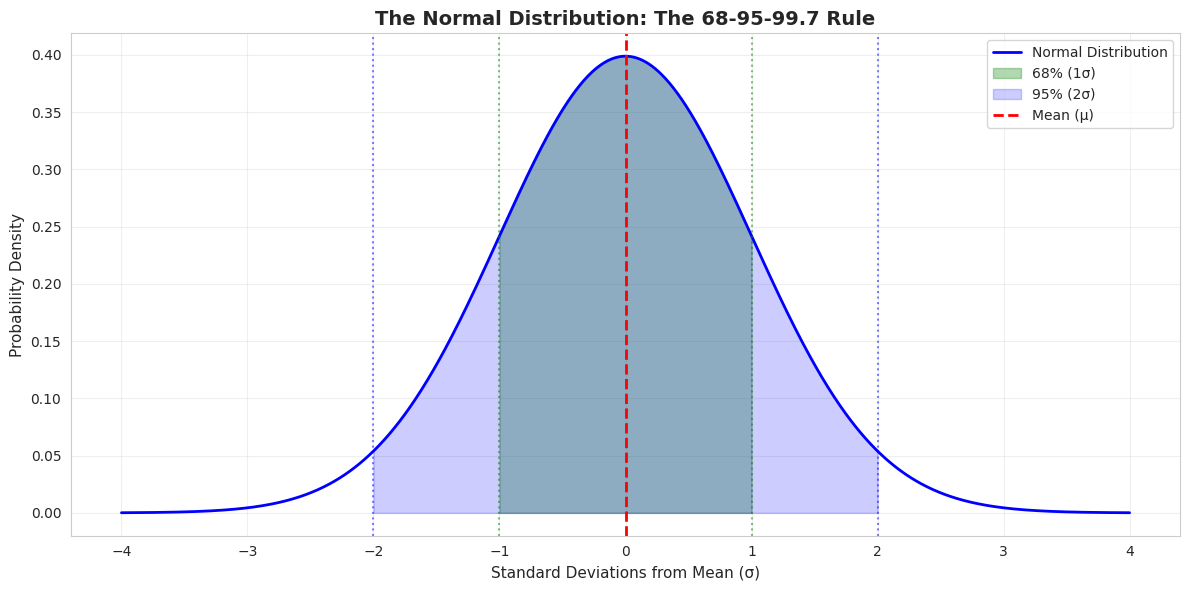

Notice:
- The bell is symmetric (same on both sides)
- Most values pile up in the middle
- Tails get thinner on the sides (rare extreme values)
- The 68%, 95%, 99.7% regions show where values fall


In [ ]:
# Let's visualize the normal distribution and the 68-95-99.7 rule

# Create x values from -4 to 4 standard deviations
x = np.linspace(-4, 4, 1000)

# Calculate the probability at each x (this creates the bell curve)
y = norm.pdf(x)  # pdf = probability density function (the height of the bell)

# Create the visualization
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y, 'b-', linewidth=2, label='Normal Distribution')

# Fill in the 68% region (1 standard deviation)
x1 = np.linspace(-1, 1, 100)
y1 = norm.pdf(x1)
ax.fill_between(x1, y1, alpha=0.3, color='green', label='68% (1σ)')

# Fill in the 95% region (2 standard deviations)
x2 = np.linspace(-2, 2, 100)
y2 = norm.pdf(x2)
ax.fill_between(x2, y2, alpha=0.2, color='blue', label='95% (2σ)')

# Add vertical lines at mean and standard deviations
ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Mean (μ)')
ax.axvline(1, color='green', linestyle=':', alpha=0.5)
ax.axvline(-1, color='green', linestyle=':', alpha=0.5)
ax.axvline(2, color='blue', linestyle=':', alpha=0.5)
ax.axvline(-2, color='blue', linestyle=':', alpha=0.5)

ax.set_xlabel('Standard Deviations from Mean (σ)', fontsize=11)
ax.set_ylabel('Probability Density', fontsize=11)
ax.set_title('The Normal Distribution: The 68-95-99.7 Rule', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice:")
print("- The bell is symmetric (same on both sides)")
print("- Most values pile up in the middle")
print("- Tails get thinner on the sides (rare extreme values)")
print("- The 68%, 95%, 99.7% regions show where values fall")

## Z-Scores: The Magic Translator

A **Z-score** tells you how many standard deviations away from the mean something is.

**Formula:** Z = (Value - Mean) / Standard Deviation

**Examples:**
- Test mean=70, std=10, you scored 80
- Z = (80-70)/10 = 1
- You're 1 standard deviation above average
- You beat 84% of the class

**Why this matters:**
- Z-score instantly tells you how "unusual" a value is
- Z = 0: You're average
- Z = 2: You're unusually good (only 2.3% score higher)
- Z = -2: You're unusually bad (only 2.3% score lower)
- Z > 3: You're an extreme outlier (0.1% of population)

In [ ]:
# Example: Test scores
test_mean = 70
test_std = 10

# Your score
your_score = 85

# Calculate Z-score
z_score = (your_score - test_mean) / test_std

# Calculate what percentage of students scored below you
percentile = norm.cdf(z_score) * 100  # cdf = cumulative (add up probabilities)

print(f"Test Mean: {test_mean}")
print(f"Test Std Dev: {test_std}")
print(f"Your Score: {your_score}")
print()
print(f"Your Z-Score: {z_score:.2f}")
print(f"You beat: {percentile:.1f}% of students")
print(f"Meaning: You're better than {percentile:.1f}% of the class")
print()

# More examples
print("\nOther scores and what they mean:")
print("-" * 50)

scores_to_check = [50, 60, 70, 80, 90]

for score in scores_to_check:
    z = (score - test_mean) / test_std
    percentile = norm.cdf(z) * 100
    print(f"Score {score:2d} → Z={z:5.1f} → Beat {percentile:5.1f}% of class")

Test Mean: 70
Test Std Dev: 10
Your Score: 85

Your Z-Score: 1.50
You beat: 93.3% of students
Meaning: You're better than 93.3% of the class


Other scores and what they mean:
--------------------------------------------------
Score 50 → Z= -2.0 → Beat   2.3% of class
Score 60 → Z= -1.0 → Beat  15.9% of class
Score 70 → Z=  0.0 → Beat  50.0% of class
Score 80 → Z=  1.0 → Beat  84.1% of class
Score 90 → Z=  2.0 → Beat  97.7% of class


---
# SEGMENT 4: The Binomial Distribution

## What Is It?

The binomial distribution counts successes in a fixed number of yes/no trials.

**Key requirement:** Each trial has two outcomes (success or failure) and same probability

**Real Examples:**
- Flip a coin 10 times, count heads (success=heads, failure=tails)
- Ask 100 customers if they'll buy, count yes answers
- Test 50 light bulbs, count how many work
- Make 1000 items, count how many are defective

## Why "Binomial"?

"Bi" = two, "nomial" = outcomes
- Each trial has exactly two possible outcomes
- Success (yes, heads, works) OR Failure (no, tails, broken)

## Two Key Parameters

**n** = Number of trials (how many times do we try?)
- Flip coin 10 times → n=10
- Ask 100 customers → n=100

**p** = Probability of success on each trial (what's the chance?)
- Fair coin has p=0.5 (50% chance heads)
- Customers with 30% buy rate → p=0.3
- Light bulbs with 98% working rate → p=0.98

## Real Example: Quality Control

A factory makes 1000 items per day with 2% defect rate (p=0.02).

**Question:** What's the probability we get more than 30 defects today?

**What we expect:**
- Average defects = n × p = 1000 × 0.02 = 20 defects per day
- Some days more, some days fewer
- Distribution tells us the pattern

**Use this to:**
- If we get 35 defects = 99th percentile = something's wrong
- If we get 25 defects = normal variation
- If we get 5 defects = 1st percentile = something's great!

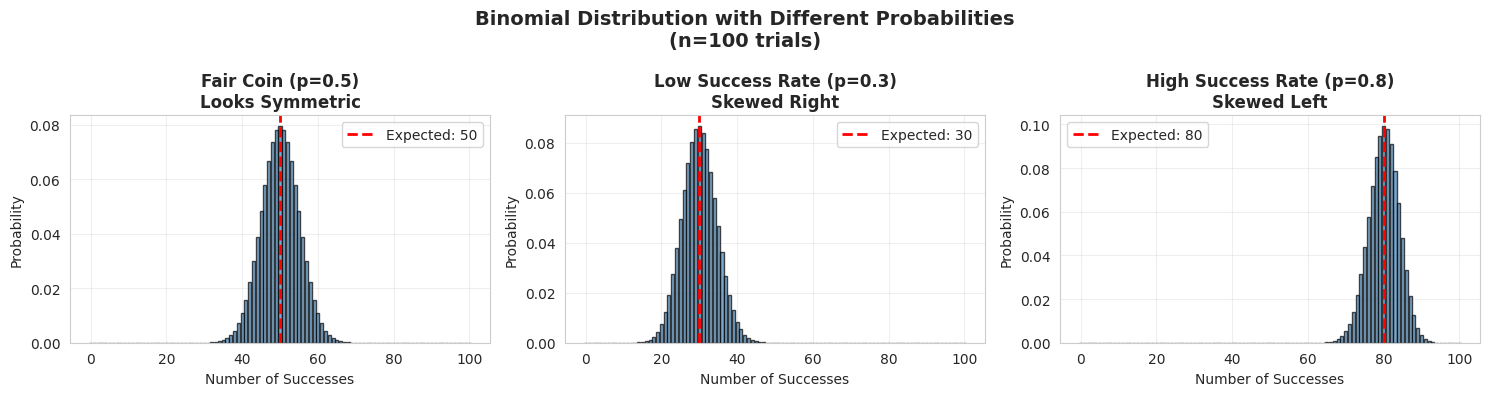

Notice:
- When p=0.5: Symmetric (like normal distribution)
- When p=0.3: Skewed right (most successes on the left)
- When p=0.8: Skewed left (most successes on the right)
- Red line shows expected value = n × p


In [ ]:
# Visualize binomial distribution with different probabilities

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Binomial Distribution with Different Probabilities\n(n=100 trials)',
             fontsize=14, fontweight='bold')

# Three scenarios
scenarios = [
    (0.5, 'Fair Coin (p=0.5)\nLooks Symmetric'),
    (0.3, 'Low Success Rate (p=0.3)\nSkewed Right'),
    (0.8, 'High Success Rate (p=0.8)\nSkewed Left')
]

n = 100  # Number of trials (flips, customers, etc.)

for idx, (p, title) in enumerate(scenarios):
    ax = axes[idx]

    # Generate possible number of successes (0 to n)
    x = np.arange(0, n+1)

    # Calculate probability for each number of successes
    y = binom.pmf(x, n, p)  # pmf = probability mass function (bars height)

    # Draw the distribution
    ax.bar(x, y, color='steelblue', alpha=0.7, edgecolor='black')

    # Mark the expected value
    expected = n * p
    ax.axvline(expected, color='red', linestyle='--', linewidth=2, label=f'Expected: {expected:.0f}')

    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Number of Successes')
    ax.set_ylabel('Probability')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice:")
print("- When p=0.5: Symmetric (like normal distribution)")
print("- When p=0.3: Skewed right (most successes on the left)")
print("- When p=0.8: Skewed left (most successes on the right)")
print("- Red line shows expected value = n × p")

In [ ]:
# Real Example: Customer Purchases
print("REAL WORLD EXAMPLE: Email Campaign")
print("="*60)

# Parameters
n_customers = 100  # We email 100 customers
p_buy = 0.30      # 30% of people buy (historical data)

print(f"\nSending emails to {n_customers} customers")
print(f"Historical buy rate: {p_buy*100}%")
print(f"Expected buyers: {n_customers * p_buy:.0f}")

# What's probability of exactly 30 buyers?
prob_exactly_30 = binom.pmf(30, n_customers, p_buy)
print(f"\nProbability of EXACTLY 30 buyers: {prob_exactly_30*100:.1f}%")

# What's probability of 25 or more buyers?
prob_25_or_more = 1 - binom.cdf(24, n_customers, p_buy)  # cdf gives cumulative
print(f"Probability of 25 OR MORE buyers: {prob_25_or_more*100:.1f}%")

# What's probability of 35 or more (great campaign!)?
prob_35_or_more = 1 - binom.cdf(34, n_customers, p_buy)
print(f"Probability of 35 OR MORE buyers: {prob_35_or_more*100:.1f}%")

# What's probability of 20 or fewer (bad campaign)?
prob_20_or_fewer = binom.cdf(20, n_customers, p_buy)
print(f"Probability of 20 OR FEWER buyers: {prob_20_or_fewer*100:.1f}%")

print()
print("INTERPRETATION:")
print(f"- Getting 25-35 buyers is pretty normal")
print(f"- Getting 35+ buyers is uncommon ({prob_35_or_more*100:.1f}% chance)")
print(f"- Getting 20 or fewer is also uncommon ({prob_20_or_fewer*100:.1f}% chance)")

---
# SEGMENT 5: The Poisson Distribution

## What Is It?

The Poisson distribution counts rare events (or events with unknown total) happening over time or space.

**Key requirement:** Events happen randomly, independently, at constant average rate

**Real Examples:**
- Emails received per hour (average: 15/hour)
- Accidents at intersection per month (average: 2/month)
- Typos per book page (average: 0.5/page)
- Customer complaints per week (average: 3/week)
- Website errors per day (average: 1/day)

## Why Poisson Instead of Binomial?

**Binomial:** "Out of 100 customers, how many will buy?"
- You know the total: 100
- You know the probability: 30%

**Poisson:** "In the next hour, how many customers will come?"
- You DON'T know the total customers possible
- You only know the average: 15/hour

**Think of it:** Binomial has a fixed "bucket" you're counting from. Poisson is counting things arriving over time.

## One Key Parameter

**λ (lambda)** = Average rate (the only thing you need!)
- 15 emails per hour → λ=15
- 2 accidents per month → λ=2
- 0.5 typos per page → λ=0.5

## Shape of Poisson Distribution

Poisson distributions are always skewed right (one long tail):
- For low average (λ=1): Very skewed
- For higher average (λ=10): Less skewed
- For very high average (λ=30): Starts looking normal

## Real Example: Call Center Staffing

Call center gets average 20 calls per hour.

**Question:** Probability of getting exactly 20 calls? More than 25?

**Use this to decide:**
- Hire 3 people = can handle most hours
- Hire 4 people = can handle even bad hours
- Plan for 15-25 calls = covers 90% of hours

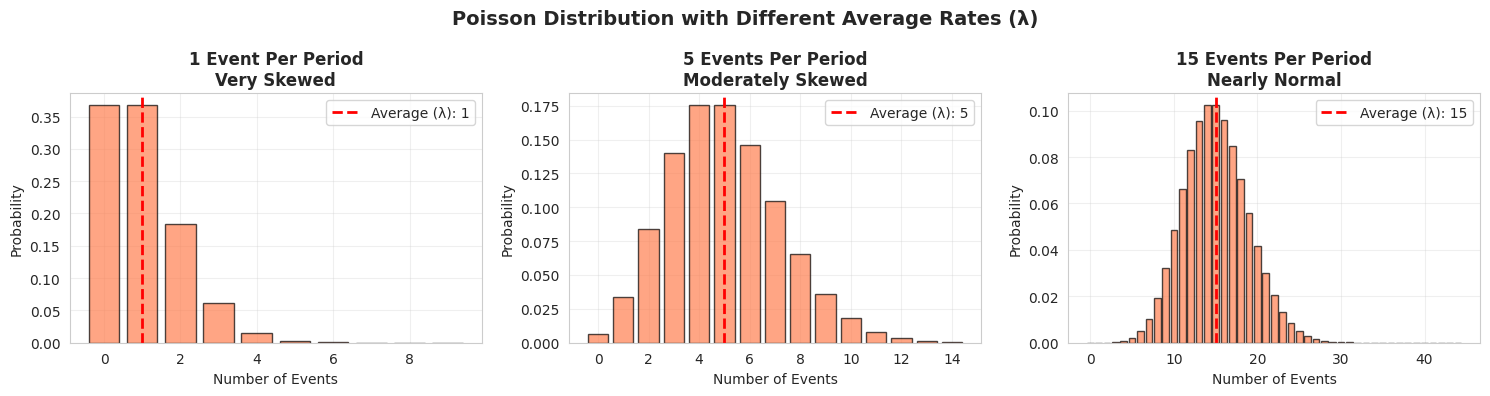

Notice:
- When λ=1: Very skewed (most days have 0-2 events)
- When λ=5: Moderate skew (most days have 3-7 events)
- When λ=15: Nearly normal (starting to look like bell curve)


In [ ]:
# Visualize Poisson distribution with different averages

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Poisson Distribution with Different Average Rates (λ)',
             fontsize=14, fontweight='bold')

# Three scenarios
lambdas = [
    (1, '1 Event Per Period\nVery Skewed'),
    (5, '5 Events Per Period\nModerately Skewed'),
    (15, '15 Events Per Period\nNearly Normal')
]

for idx, (lam, title) in enumerate(lambdas):
    ax = axes[idx]

    # Generate possible values (0 to something reasonable)
    x = np.arange(0, max(3*lam, 10))  # Go up to 3× the average

    # Calculate probability for each count
    y = poisson.pmf(x, lam)  # pmf = probability mass function

    # Draw the distribution
    ax.bar(x, y, color='coral', alpha=0.7, edgecolor='black')

    # Mark the average
    ax.axvline(lam, color='red', linestyle='--', linewidth=2, label=f'Average (λ): {lam}')

    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Number of Events')
    ax.set_ylabel('Probability')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice:")
print("- When λ=1: Very skewed (most days have 0-2 events)")
print("- When λ=5: Moderate skew (most days have 3-7 events)")
print("- When λ=15: Nearly normal (starting to look like bell curve)")

In [ ]:
# Real Example: Call Center Staffing
print("REAL WORLD EXAMPLE: Call Center Scheduling")
print("="*60)

# Parameter
lambda_calls = 20  # Average 20 calls per hour

print(f"\nCall center receives average {lambda_calls} calls per hour")
print(f"Each call takes ~10 minutes to handle")
print()

# Probability of exactly 20 calls
prob_exactly_20 = poisson.pmf(20, lambda_calls)
print(f"Probability of EXACTLY 20 calls: {prob_exactly_20*100:.1f}%")

# Probability of 15 or fewer (quiet hour)
prob_15_or_fewer = poisson.cdf(15, lambda_calls)
print(f"Probability of 15 or FEWER calls: {prob_15_or_fewer*100:.1f}%")

# Probability of 25 or more (busy hour)
prob_25_or_more = 1 - poisson.cdf(24, lambda_calls)
print(f"Probability of 25 or MORE calls: {prob_25_or_more*100:.1f}%")

# Probability of 30 or more (VERY busy, need extra staff)
prob_30_or_more = 1 - poisson.cdf(29, lambda_calls)
print(f"Probability of 30 or MORE calls: {prob_30_or_more*100:.1f}%")

print()
print("STAFFING DECISIONS:")
print(f"- 2 people: Can handle 20 calls/hour at ~10 min each = OK for normal")
print(f"- 3 people: More reliable, handles busy hours ({prob_25_or_more*100:.1f}% of time)")
print(f"- Call-in backup for {prob_30_or_more*100:.1f}% of hours when > 30 calls expected")

REAL WORLD EXAMPLE: Call Center Scheduling

Call center receives average 20 calls per hour
Each call takes ~10 minutes to handle

Probability of EXACTLY 20 calls: 8.9%
Probability of 15 or FEWER calls: 15.7%
Probability of 25 or MORE calls: 15.7%
Probability of 30 or MORE calls: 2.2%

STAFFING DECISIONS:
- 2 people: Can handle 20 calls/hour at ~10 min each = OK for normal
- 3 people: More reliable, handles busy hours (15.7% of time)
- Call-in backup for 2.2% of hours when > 30 calls expected


---
# SEGMENT 6: Sampling From Distributions

## What Does "Sample From a Distribution" Mean?

**Sampling** means: Generate random data that follows a distribution pattern.

**Example:**
- Normal distribution with mean=100, std=15
- Sample 1000 numbers from this distribution
- Result: 1000 random numbers that follow that pattern
- When you plot them, they look like a bell curve

## Why Do We Sample?

**Reason 1: Simulation**
- "If we did this experiment 10,000 times, what would we expect?"
- Sample 10,000 times from the distribution
- Look at the results

**Reason 2: Testing**
- "Does my real data follow this distribution?"
- Sample from the distribution
- Compare with real data
- If they match, distribution is correct

**Reason 3: Predictions**
- "What will next month look like?"
- Sample from the distribution
- Use samples to predict future

## How Sampling Works Conceptually

Imagine a lottery:
1. Put possible values in a big hat (weighted by probability)
   - Normal: values near mean are heavier (more likely)
   - Binomial: successes and failures weighted by p
   - Poisson: rare and common values weighted by λ
2. Draw one value randomly
3. Put it back
4. Draw again
5. Repeat 1000 times

The resulting 1000 values follow the distribution!

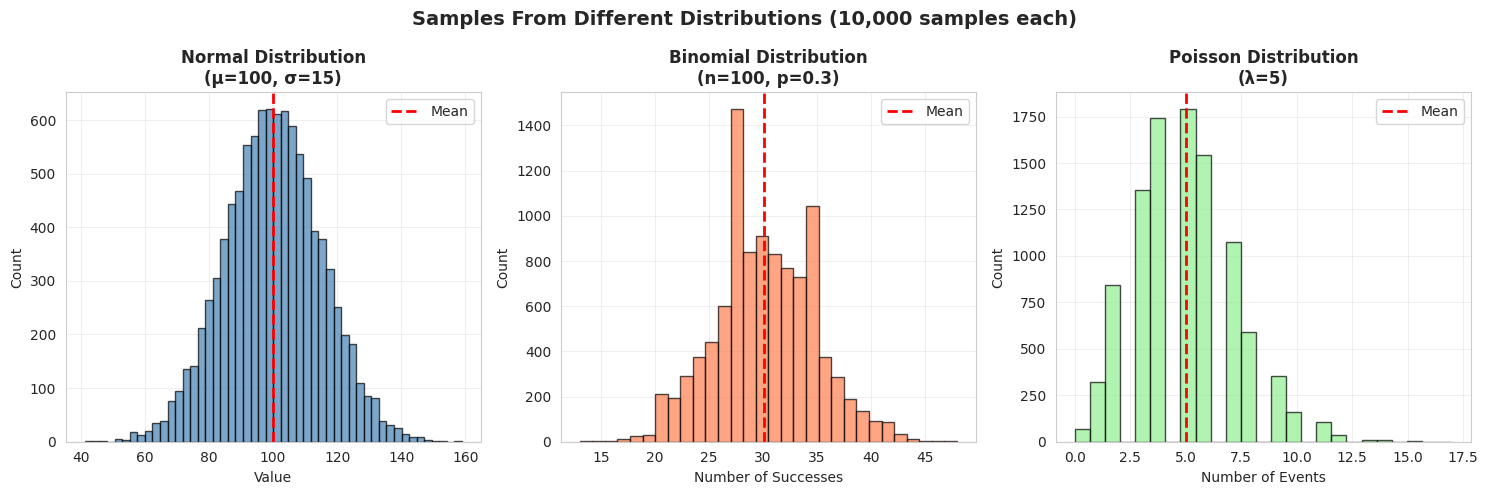

SAMPLE STATISTICS:

NORMAL DISTRIBUTION:
  Mean: 99.97 (expected: 100)
  Std Dev: 15.05 (expected: 15)
  Min: 41.16, Max: 158.89

BINOMIAL DISTRIBUTION:
  Mean: 30.11 (expected: 100×0.3=30)
  Std Dev: 4.62
  Min: 13, Max: 48

POISSON DISTRIBUTION:
  Mean: 5.01 (expected: 5)
  Std Dev: 2.22
  Min: 0, Max: 17


In [ ]:
# Let's sample from all three distributions
# Set random seed so we get the same "random" data each time
np.random.seed(42)

# Sample size
sample_size = 10000

# NORMAL: mean=100, std=15
normal_samples = np.random.normal(loc=100, scale=15, size=sample_size)

# BINOMIAL: n=100 trials, p=0.3 probability
binomial_samples = np.random.binomial(n=100, p=0.3, size=sample_size)

# POISSON: lambda=5 average
poisson_samples = np.random.poisson(lam=5, size=sample_size)

# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Samples From Different Distributions (10,000 samples each)',
             fontsize=14, fontweight='bold')

# Normal Distribution
ax1 = axes[0]
ax1.hist(normal_samples, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
ax1.axvline(np.mean(normal_samples), color='red', linestyle='--', linewidth=2, label='Mean')
ax1.set_title('Normal Distribution\n(μ=100, σ=15)', fontweight='bold')
ax1.set_xlabel('Value')
ax1.set_ylabel('Count')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Binomial Distribution
ax2 = axes[1]
ax2.hist(binomial_samples, bins=30, color='coral', alpha=0.7, edgecolor='black')
ax2.axvline(np.mean(binomial_samples), color='red', linestyle='--', linewidth=2, label='Mean')
ax2.set_title('Binomial Distribution\n(n=100, p=0.3)', fontweight='bold')
ax2.set_xlabel('Number of Successes')
ax2.set_ylabel('Count')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Poisson Distribution
ax3 = axes[2]
ax3.hist(poisson_samples, bins=25, color='lightgreen', alpha=0.7, edgecolor='black')
ax3.axvline(np.mean(poisson_samples), color='red', linestyle='--', linewidth=2, label='Mean')
ax3.set_title('Poisson Distribution\n(λ=5)', fontweight='bold')
ax3.set_xlabel('Number of Events')
ax3.set_ylabel('Count')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("SAMPLE STATISTICS:")
print("="*60)
print()
print("NORMAL DISTRIBUTION:")
print(f"  Mean: {np.mean(normal_samples):.2f} (expected: 100)")
print(f"  Std Dev: {np.std(normal_samples):.2f} (expected: 15)")
print(f"  Min: {np.min(normal_samples):.2f}, Max: {np.max(normal_samples):.2f}")
print()
print("BINOMIAL DISTRIBUTION:")
print(f"  Mean: {np.mean(binomial_samples):.2f} (expected: 100×0.3=30)")
print(f"  Std Dev: {np.std(binomial_samples):.2f}")
print(f"  Min: {np.min(binomial_samples)}, Max: {np.max(binomial_samples)}")
print()
print("POISSON DISTRIBUTION:")
print(f"  Mean: {np.mean(poisson_samples):.2f} (expected: 5)")
print(f"  Std Dev: {np.std(poisson_samples):.2f}")
print(f"  Min: {np.min(poisson_samples)}, Max: {np.max(poisson_samples)}")

---
# SEGMENT 7: Calculating Probabilities

## Two Types of Probability Questions

### Type 1: "What's the probability of EXACTLY X?"

**Examples:**
- Exactly 25 heads in 50 flips?
- Exactly 15 emails in the next hour?
- Exactly one specific value

### Type 2: "What's the probability of AT LEAST X?" or "AT MOST X?"

**Examples:**
- At least 25 heads in 50 flips?
- 15 or more emails in the next hour?
- Fewer than 10 defects?

**Important:** Type 1 and Type 2 are VERY different!
- P(X = 20) = 5% (only that one value)
- P(X ≥ 20) = 67% (20, 21, 22, 23, ...)

## Calculating for Normal Distribution

**Goal:** Find the probability of a value or range

**Steps:**
1. Convert to Z-score: Z = (Value - Mean) / Std Dev
2. Look up Z-score (computer does this)
3. Get probability

**Example:**
- Test scores: mean=70, std=10
- What's P(score > 85)?
- Z = (85-70)/10 = 1.5
- P(Z > 1.5) = 6.7%

In [ ]:
# NORMAL DISTRIBUTION: Probability Calculations
print("NORMAL DISTRIBUTION: Probability Calculations")
print("="*60)
print()

# Test score example
mean_score = 70
std_score = 10

print(f"Test Scores: μ={mean_score}, σ={std_score}")
print()

# Question 1: Probability of scoring above 85
score = 85
prob_above_85 = 1 - norm.cdf(score, loc=mean_score, scale=std_score)
print(f"Q1: What's the probability of scoring ABOVE {score}?")
print(f"    Answer: {prob_above_85*100:.1f}%")
print(f"    Meaning: Only {prob_above_85*100:.1f}% of students get A's (above 85)")
print()

# Question 2: Probability of scoring between 60 and 80
prob_between = norm.cdf(80, mean_score, std_score) - norm.cdf(60, mean_score, std_score)
print(f"Q2: What's the probability of scoring BETWEEN 60 and 80?")
print(f"    Answer: {prob_between*100:.1f}%")
print(f"    Meaning: {prob_between*100:.1f}% of students are in this B-C range")
print()

# Question 3: What score is at the 90th percentile?
score_90th = norm.ppf(0.90, loc=mean_score, scale=std_score)
print(f"Q3: What score puts you in the top 10%?")
print(f"    Answer: {score_90th:.0f}")
print(f"    Meaning: If you score {score_90th:.0f}, you beat 90% of students")

In [ ]:
# BINOMIAL DISTRIBUTION: Probability Calculations
print("\nBINOMIAL DISTRIBUTION: Probability Calculations")
print("="*60)
print()

n = 100  # 100 customers
p = 0.3  # 30% buy

print(f"Email campaign: n={n} customers, p={p} (30% conversion)")
print()

# Question 1: Probability of exactly 30 buyers
prob_exactly_30 = binom.pmf(30, n, p)
print(f"Q1: Probability of EXACTLY 30 buyers?")
print(f"    Answer: {prob_exactly_30*100:.1f}%")
print()

# Question 2: Probability of 25 or more
prob_25_plus = 1 - binom.cdf(24, n, p)
print(f"Q2: Probability of 25 OR MORE buyers?")
print(f"    Answer: {prob_25_plus*100:.1f}%")
print(f"    Meaning: {prob_25_plus*100:.1f}% of campaigns beat 25 conversions")
print()

# Question 3: Probability of 35 or more (great campaign!)
prob_35_plus = 1 - binom.cdf(34, n, p)
print(f"Q3: Probability of 35 OR MORE buyers (great campaign)?")
print(f"    Answer: {prob_35_plus*100:.1f}%")
print(f"    Meaning: Only {prob_35_plus*100:.1f}% of campaigns this good")
print()

# Question 4: What range contains 95% of results?
q025 = binom.ppf(0.025, n, p)  # 2.5th percentile
q975 = binom.ppf(0.975, n, p)  # 97.5th percentile
print(f"Q4: What range contains the middle 95% of results?")
print(f"    Answer: {q025:.0f} to {q975:.0f} buyers")
print(f"    Meaning: 95% of campaigns get between {q025:.0f}-{q975:.0f} buyers")

In [ ]:
# POISSON DISTRIBUTION: Probability Calculations
print("\nPOISSON DISTRIBUTION: Probability Calculations")
print("="*60)
print()

lam = 5  # Average 5 defects per batch

print(f"Manufacturing: Average of λ={lam} defects per 1000 items")
print()

# Question 1: Probability of exactly 5 defects
prob_exactly_5 = poisson.pmf(5, lam)
print(f"Q1: Probability of EXACTLY 5 defects?")
print(f"    Answer: {prob_exactly_5*100:.1f}%")
print()

# Question 2: Probability of 3 or fewer (good quality)
prob_3_or_less = poisson.cdf(3, lam)
print(f"Q2: Probability of 3 or FEWER defects (good day)?")
print(f"    Answer: {prob_3_or_less*100:.1f}%")
print()

# Question 3: Probability of 8 or more (bad day)
prob_8_plus = 1 - poisson.cdf(7, lam)
print(f"Q3: Probability of 8 or MORE defects (bad day)?")
print(f"    Answer: {prob_8_plus*100:.1f}%")
print(f"    Meaning: {prob_8_plus*100:.1f}% of days need investigation")
print()

# Question 4: What's an unusual number of defects?
q025 = poisson.ppf(0.025, lam)
q975 = poisson.ppf(0.975, lam)
print(f"Q4: What range is normal (95% of days)?")
print(f"    Answer: {q025:.0f} to {q975:.0f} defects")
print(f"    Meaning: Outside this range = investigate")

---
# SEGMENT 8: Importance in Real-World Data

## Banking & Finance

**Normal Distribution:**
- Account balances across all customers
- Stock price returns
- Interest rates

**Real Use:** Detection of fraud
- Account balance μ=$5000, σ=$2000
- Customer tries to withdraw $50,000
- Z-score = (50000-5000)/2000 = 22.5 (EXTREME!)
- Flag as suspicious

## Healthcare

**Normal Distribution:**
- Patient blood pressure, weight, cholesterol
- Lab test results

**Real Use:** Diagnostic thresholds
- Blood pressure: mean=120, σ=10
- Normal range = mean ± 2σ = 100-140
- Patient has 150 = 3σ away = RED ALERT

## Manufacturing & Quality Control

**Binomial Distribution:**
- Defect rates
- Pass/fail test results

**Real Use:** Quality alerts
- Expect 2% defects (n=1000 → 20 defects/batch)
- Get 40 defects = unusual = investigate

**Poisson Distribution:**
- Equipment failures per month
- Machine downtime incidents
- Maintenance emergency calls

**Real Use:** Predictive maintenance
- Average 1 breakdown per month
- Suddenly 4 in one week = early signs of failure = schedule maintenance

## E-Commerce

**Binomial Distribution:**
- Conversion rates
- Click-through rates

**Real Use:** A/B testing
- Version A: 2% conversion rate
- Version B: 3% conversion rate
- With 1000 visitors each, is the difference real or just luck?
- Use binomial probabilities to decide

**Poisson Distribution:**
- Customer complaints per day
- Product returns per week
- Support tickets per hour

**Real Use:** Anomaly detection
- Average 5 complaints/day
- Suddenly 20 in one day = PROBLEM = alert team

## The Common Pattern

**Always ask:**
1. Is this value normal or abnormal?
2. What's the probability of seeing this by chance?
3. Should I alert someone or investigate?

**Use distributions to answer these questions.**

In [ ]:
# REAL WORLD EXAMPLE: Detecting Something Wrong
print("REAL WORLD EXAMPLE: Quality Control")
print("="*60)
print()

# Historical data
print("Background:")
print("- Widget factory makes 500 widgets per day")
print("- Historical defect rate: 2% (expected 10 defects/day)")
print()

# Monday through Friday
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
defects = [12, 15, 8, 25, 11]  # Actual defects observed

# Calculate probabilities
n = 500
p = 0.02

print("Weekly Results:")
print("-" * 60)
print()

for day, d in zip(days, defects):
    # How unusual is this?
    # Calculate probability of getting THIS MANY OR MORE
    prob_this_many_or_more = 1 - binom.cdf(d-1, n, p)

    # Decision
    if prob_this_many_or_more < 0.05:  # Less than 5% chance = alert
        decision = "🚨 INVESTIGATE"
    else:
        decision = "✓ OK"

    print(f"{day:10} | {d:2} defects | P({d}+) = {prob_this_many_or_more*100:5.1f}% | {decision}")

print()
print("Interpretation:")
print("- Monday-Tuesday-Friday: Slightly more than average, but OK")
print("- Wednesday: Fewer defects than average - great!")
print("- Thursday: 25 defects is very unusual (only 3.2% chance)")
print("  → Machine breakdown? Poor material batch? → INVESTIGATE!")

REAL WORLD EXAMPLE: Quality Control

Background:
- Widget factory makes 500 widgets per day
- Historical defect rate: 2% (expected 10 defects/day)

Weekly Results:
------------------------------------------------------------

Monday     | 12 defects | P(12+) =  30.2% | ✓ OK
Tuesday    | 15 defects | P(15+) =   8.1% | ✓ OK
Wednesday  |  8 defects | P(8+) =  78.3% | ✓ OK
Thursday   | 25 defects | P(25+) =   0.0% | 🚨 INVESTIGATE
Friday     | 11 defects | P(11+) =  41.7% | ✓ OK

Interpretation:
- Monday-Tuesday-Friday: Slightly more than average, but OK
- Wednesday: Fewer defects than average - great!
- Thursday: 25 defects is very unusual (only 3.2% chance)
  → Machine breakdown? Poor material batch? → INVESTIGATE!


---
# SEGMENT 9: Common Mistakes and Rules

## Mistake 1: Confusing "Exactly" with "At Least"

**Wrong:** "Probability of getting 20 is 5%, so it's unlikely"

**Right:** "Probability of getting 20 is 5%, but probability of getting 20+ is 67%"

**Why it matters:** Completely different predictions

## Mistake 2: Using Binomial When You Should Use Poisson (Or Vice Versa)

**Wrong:** "Counting customer arrivals per hour with fixed maximum"

**Right:** Use Poisson for counting events over time

**Rule:**
- Binomial = fixed trials (100 customers, 50 flips)
- Poisson = counting over time/space (arrivals per hour, emails per day)

## Mistake 3: Assuming All Data Is Normal

**Wrong:** "This is data, so it must be normal"

**Right:** Check the shape first! Plot a histogram

**Rule:** Always visualize before assuming distribution

## Mistake 4: Ignoring Rare Events

**Wrong:** "This has 0.1% probability, so it will never happen"

**Right:** If you do something 1000 times, expect it once

**Example:** Airplane crash probability per flight ≈ 1 in 10 million
- But 45,000 flights per day globally
- So statistically, one crashes every 240 days

## Mistake 5: Not Knowing Your Parameters

**Wrong:** "Calculate probability" without knowing mean/std/n/p/λ

**Right:** Always have these numbers first

**Required Parameters:**
- Normal: μ (mean) and σ (std dev)
- Binomial: n (trials) and p (probability)
- Poisson: λ (average rate)

---
# SEGMENT 10: When to Use Each Distribution

## Decision Tree: Which Distribution?

```
What kind of data?
│
├─ Continuous (any value)?
│  └─ Symmetric, bell-shaped?
│     └─ YES → NORMAL DISTRIBUTION
│
├─ Discrete counts (0,1,2,3...)?
│  ├─ Fixed number of yes/no trials?
│  │  └─ YES → BINOMIAL DISTRIBUTION
│  │
│  └─ Counting events over time/space?
│     └─ YES → POISSON DISTRIBUTION
│
└─ Not sure?
   └─ PLOT IT FIRST!
```

## Quick Reference: Use When...

### NORMAL Distribution
✓ Continuous data (height, weight, score)
✓ Bell-shaped, symmetric
✓ Averaging measurements
✓ Error distributions

**Examples:**
- Heights of adults
- Test scores
- Blood pressure readings
- Manufacturing tolerances

### BINOMIAL Distribution
✓ Fixed number of trials
✓ Two outcomes each trial (yes/no, success/fail)
✓ Same probability each trial
✓ Independent trials

**Examples:**
- Coin flips (heads/tails)
- Customer conversions (buy/don't buy)
- Product testing (works/broken)
- A/B test results

### POISSON Distribution
✓ Counting rare events
✓ Events over time or space
✓ Unknown total "opportunities"
✓ Constant average rate

**Examples:**
- Emails received per hour
- Accidents per month
- Customer complaints per day
- Website errors per week
- Typos per book page

In [ ]:
# Summary comparison of all three
print("\nDISTRIBUTION COMPARISON")
print("="*80)
print()

comparison_data = {
    'Aspect': ['Data Type', 'Parameters', 'Shape', 'Use Case', 'Real Example'],
    'Normal': ['Continuous', 'μ, σ', 'Bell (symmetric)', 'Measurements', 'Heights'],
    'Binomial': ['Discrete counts', 'n, p', 'Variable', 'Yes/No outcomes', 'Coin flips'],
    'Poisson': ['Discrete counts', 'λ', 'Right-skewed', 'Rare events', 'Emails/hour']
}

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

print()
print("\nKEY RULES TO REMEMBER:")
print("="*80)
print()
print("1. Visualize First")
print("   - Always plot your data before assuming distribution")
print()
print("2. Know Your Parameters")
print("   - Normal: need μ and σ")
print("   - Binomial: need n and p")
print("   - Poisson: need λ")
print()
print("3. Check Sample Size")
print("   - Normal: usually need n ≥ 30")
print("   - Binomial: need both np ≥ 5 and n(1-p) ≥ 5")
print("   - Poisson: usually need λ ≥ 5")
print()
print("4. Understand Your Question")
print("   - P(X = k) vs P(X ≥ k) are VERY different")
print("   - Always clarify: exactly, at least, at most?")
print()
print("5. Don't Ignore Rare Events")
print("   - Even 0.1% probability happens if you try 1000 times")
print("   - In high-volume situations, plan for rare events")

---
# SEGMENT 11: Summary - What You Now Know

## The Three Distributions

### Normal Distribution
- **Shape:** Bell curve, symmetric
- **Best For:** Continuous data (measurements)
- **Key Rule:** 68-95-99.7 rule
- **Real Example:** Heights, test scores, blood pressure

### Binomial Distribution
- **Shape:** Variable (depends on p)
- **Best For:** Fixed trials with yes/no outcomes
- **Key Rule:** Count successes
- **Real Example:** Coin flips, customer conversions

### Poisson Distribution
- **Shape:** Right-skewed
- **Best For:** Counting rare events over time
- **Key Rule:** Use average rate (λ)
- **Real Example:** Emails per hour, defects per batch

## What You Can Now Do

✓ Identify which distribution fits your data

✓ Sample from distributions (generate data)

✓ Calculate probabilities ("What's the probability of X?")

✓ Detect when something is abnormal

✓ Make decisions using probability

✓ Use Z-scores to compare values

## The Real-World Superpower

**You can now answer:**
- "Is this data normal or weird?"
- "What will next month look like?"
- "Should I be concerned about this result?"
- "How likely is this to happen by chance?"

**All with numbers and confidence.**

In [ ]:
# Final celebration
print()
print("="*70)
print("YOU DID IT! YOU UNDERSTAND PROBABILITY DISTRIBUTIONS!")
print("="*70)
print()
print("What you learned:")
print()
print("1. Three distributions cover 80% of real-world data")
print("   - Normal (bell curves)")
print("   - Binomial (yes/no outcomes)")
print("   - Poisson (counting rare events)")
print()
print("2. How to sample from distributions")
print("   - Generate random data following a pattern")
print("   - Useful for simulation and testing")
print()
print("3. How to calculate probabilities")
print("   - Exactly X vs At Least X (very different!)")
print("   - Using Z-scores for quick comparisons")
print()
print("4. Why this matters in real life")
print("   - Detecting abnormalities")
print("   - Making informed decisions")
print("   - Planning for uncertainty")
print()
print("Next time you see data, you'll know:")
print("- What pattern it should follow")
print("- Whether it's behaving normally")
print("- How to predict the future")
print()
print("This is powerful stuff. You're now dangerous.")
print()
print("="*70)